## 0. Load Required Libraries

In [1]:
# !pip install imblearn

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import src.util as util
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

## 1. Import Configuration File

In [31]:
config_data = util.load_config()

## 2. Load Dataset

In [32]:
def load_dataset(config_data: dict) -> pd.DataFrame:
    # Load every set of data
    x_train = util.pickle_load(config_data["train_set_path"][0])
    y_train = util.pickle_load(config_data["train_set_path"][1])

    x_valid = util.pickle_load(config_data["valid_set_path"][0])
    y_valid = util.pickle_load(config_data["valid_set_path"][1])

    x_test = util.pickle_load(config_data["test_set_path"][0])
    y_test = util.pickle_load(config_data["test_set_path"][1])

    # Concatenate x and y each set
    train_set = pd.concat([x_train, y_train], axis = 1)
    valid_set = pd.concat([x_valid, y_valid], axis = 1)
    test_set = pd.concat([x_test, y_test], axis = 1)

    # Return 3 set of data
    return train_set, valid_set, test_set

In [33]:
train_set, valid_set, test_set = load_dataset(config_data)

### 2.1. Train Set

In [34]:
train_set["live_birth_occurrence"].value_counts()

0    82630
1    26657
Name: live_birth_occurrence, dtype: int64

### 2.2. Valid Set

In [35]:
valid_set["live_birth_occurrence"].value_counts()

0    17706
1     5713
Name: live_birth_occurrence, dtype: int64

### 2.3. Test Set

In [36]:
test_set["live_birth_occurrence"].value_counts()

0    17707
1     5712
Name: live_birth_occurrence, dtype: int64

## 3. Handling Missing Value

#### 3.1. Train Set

In [37]:
train_set.describe()

,total_number_of_previous_ivf_cycles,total_number_of_ivf_pregnancies,total_number_of_live_births_conceived_through_ivf,type_of_infertility_female_primary,type_of_infertility_female_secondary,type_of_infertility_male_primary,type_of_infertility_male_secondary,type_of_infertility_couple_primary,type_of_infertility_couple_secondary,cause_of_infertility_tubal_disease,...,causes_of_infertility_partner_sperm_motility,cause_of_infertility_partner_sperm_immunological_factors,stimulation_used,fresh_cycle,frozen_cycle,eggs_thawed,fresh_eggs_collected,eggs_mixed_with_partner_sperm,embryos_transfered,live_birth_occurrence
count,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,...,109287.000000,109287.0,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000,109287.000000
mean,1.214362,0.180909,0.127307,0.003587,0.001510,0.003376,0.001455,0.003779,0.001080,0.105163,...,0.000018,0.0,0.662275,0.686175,0.247770,0.058278,6.216512,5.082608,1.084621,0.243917
std,1.541842,0.448736,0.356505,0.059783,0.038827,0.058009,0.038115,0.061358,0.032842,0.306765,...,0.004278,0.0,0.472937,0.464048,0.431719,0.778804,7.138324,6.258508,0.788911,0.429445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,4.000000,3.000000,1.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,10.000000,9.000000,2.000000,0.000000
max,6.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,32.000000,51.000000,51.000000,3.000000,1.000000


In [38]:
train_set.isnull().sum()

patient_age_at_treatment                                    0
total_number_of_previous_ivf_cycles                         0
total_number_of_ivf_pregnancies                             0
total_number_of_live_births_conceived_through_ivf           0
type_of_infertility_female_primary                          0
type_of_infertility_female_secondary                        0
type_of_infertility_male_primary                            0
type_of_infertility_male_secondary                          0
type_of_infertility_couple_primary                          0
type_of_infertility_couple_secondary                        0
cause_of_infertility_tubal_disease                          0
cause_of_infertility_ovulatory_disorder                     0
cause_of_infertility_male_factor                            0
cause_of_infertility_patient_unexplained                    0
cause_of_infertility_endometriosis                          0
cause_of_infertility_cervical_factors                       0
cause_of

In [39]:
for col in train_set.columns:
    print(col)
    print(train_set[col].unique()[:10])
    print(train_set[col].nunique())
    print()

patient_age_at_treatment
['18 - 34' '40-42' '38-39' '35-37' '43-44' '45-50']
6

total_number_of_previous_ivf_cycles
[1 0 2 5 3 4 6]
7

total_number_of_ivf_pregnancies
[1 0 2 3 4 5 6]
7

total_number_of_live_births_conceived_through_ivf
[1 0 2 3 4 5]
6

type_of_infertility_female_primary
[0 1]
2

type_of_infertility_female_secondary
[0 1]
2

type_of_infertility_male_primary
[0 1]
2

type_of_infertility_male_secondary
[0 1]
2

type_of_infertility_couple_primary
[0 1]
2

type_of_infertility_couple_secondary
[0 1]
2

cause_of_infertility_tubal_disease
[0 1]
2

cause_of_infertility_ovulatory_disorder
[0 1]
2

cause_of_infertility_male_factor
[1 0]
2

cause_of_infertility_patient_unexplained
[0 1]
2

cause_of_infertility_endometriosis
[0 1]
2

cause_of_infertility_cervical_factors
[0 1]
2

cause_of_infertility_female_factors
[0]
1

cause_of_infertility_partner_sperm_concentration
[0 1]
2

cause_of_infertility_partner_sperm_morphology
[0 1]
2

causes_of_infertility_partner_sperm_motility
[0 1

#### 3.2. Valid Set

In [40]:
valid_set.describe()

,total_number_of_previous_ivf_cycles,total_number_of_ivf_pregnancies,total_number_of_live_births_conceived_through_ivf,type_of_infertility_female_primary,type_of_infertility_female_secondary,type_of_infertility_male_primary,type_of_infertility_male_secondary,type_of_infertility_couple_primary,type_of_infertility_couple_secondary,cause_of_infertility_tubal_disease,...,causes_of_infertility_partner_sperm_motility,cause_of_infertility_partner_sperm_immunological_factors,stimulation_used,fresh_cycle,frozen_cycle,eggs_thawed,fresh_eggs_collected,eggs_mixed_with_partner_sperm,embryos_transfered,live_birth_occurrence
count,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,...,23419.000000,23419.0,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000
mean,1.228789,0.185875,0.131645,0.003459,0.001495,0.003160,0.001665,0.003758,0.001110,0.106281,...,0.000043,0.0,0.658440,0.685768,0.249029,0.055596,6.128827,5.022717,1.091678,0.243947
std,1.550749,0.455177,0.362610,0.058710,0.038631,0.056125,0.040775,0.061186,0.033302,0.308204,...,0.006535,0.0,0.474243,0.464219,0.432460,0.775556,7.014590,6.208727,0.790567,0.429470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,4.000000,3.000000,1.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,10.000000,9.000000,2.000000,0.000000
max,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,33.000000,51.000000,51.000000,3.000000,1.000000


In [41]:
valid_set.isnull().sum()

patient_age_at_treatment                                    0
total_number_of_previous_ivf_cycles                         0
total_number_of_ivf_pregnancies                             0
total_number_of_live_births_conceived_through_ivf           0
type_of_infertility_female_primary                          0
type_of_infertility_female_secondary                        0
type_of_infertility_male_primary                            0
type_of_infertility_male_secondary                          0
type_of_infertility_couple_primary                          0
type_of_infertility_couple_secondary                        0
cause_of_infertility_tubal_disease                          0
cause_of_infertility_ovulatory_disorder                     0
cause_of_infertility_male_factor                            0
cause_of_infertility_patient_unexplained                    0
cause_of_infertility_endometriosis                          0
cause_of_infertility_cervical_factors                       0
cause_of

#### 3.3. Test Set

In [42]:
test_set.describe()

,total_number_of_previous_ivf_cycles,total_number_of_ivf_pregnancies,total_number_of_live_births_conceived_through_ivf,type_of_infertility_female_primary,type_of_infertility_female_secondary,type_of_infertility_male_primary,type_of_infertility_male_secondary,type_of_infertility_couple_primary,type_of_infertility_couple_secondary,cause_of_infertility_tubal_disease,...,causes_of_infertility_partner_sperm_motility,cause_of_infertility_partner_sperm_immunological_factors,stimulation_used,fresh_cycle,frozen_cycle,eggs_thawed,fresh_eggs_collected,eggs_mixed_with_partner_sperm,embryos_transfered,live_birth_occurrence
count,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,...,23419.0,23419.0,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000
mean,1.217174,0.181391,0.129638,0.003501,0.001196,0.003245,0.001281,0.003800,0.000769,0.104061,...,0.0,0.0,0.660874,0.687134,0.246723,0.061531,6.260216,5.114907,1.087578,0.243905
std,1.548452,0.448065,0.359017,0.059070,0.034558,0.056876,0.035769,0.061531,0.027714,0.305346,...,0.0,0.0,0.473423,0.463670,0.431113,0.803058,7.167423,6.275937,0.790708,0.429445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.000000,1.000000,0.000000,0.000000,4.000000,3.000000,1.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.000000,1.000000,0.000000,0.000000,10.000000,9.000000,2.000000,0.000000
max,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,26.000000,51.000000,51.000000,3.000000,1.000000


In [43]:
test_set.isnull().sum()

patient_age_at_treatment                                    0
total_number_of_previous_ivf_cycles                         0
total_number_of_ivf_pregnancies                             0
total_number_of_live_births_conceived_through_ivf           0
type_of_infertility_female_primary                          0
type_of_infertility_female_secondary                        0
type_of_infertility_male_primary                            0
type_of_infertility_male_secondary                          0
type_of_infertility_couple_primary                          0
type_of_infertility_couple_secondary                        0
cause_of_infertility_tubal_disease                          0
cause_of_infertility_ovulatory_disorder                     0
cause_of_infertility_male_factor                            0
cause_of_infertility_patient_unexplained                    0
cause_of_infertility_endometriosis                          0
cause_of_infertility_cervical_factors                       0
cause_of

## 4. Convert into categorical Data

### 4.1 Train Set

In [44]:
pmap = {'18 - 34':0,'35-37':1,'38-39':2,'40-42':3,'43-44':4,'45-50':5}

train_set['patient_age_at_treatment'] = train_set['patient_age_at_treatment'].map(pmap)

### 4.2 Valid Set

In [45]:
pmap = {'18 - 34':0,'35-37':1,'38-39':2,'40-42':3,'43-44':4,'45-50':5}

valid_set['patient_age_at_treatment'] = valid_set['patient_age_at_treatment'].map(pmap)

### 4.3 Test Set

In [46]:
pmap = {'18 - 34':0,'35-37':1,'38-39':2,'40-42':3,'43-44':4,'45-50':5}

test_set['patient_age_at_treatment'] = test_set['patient_age_at_treatment'].map(pmap)

## 5. Balancing Label

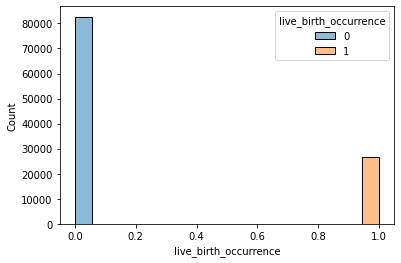

In [47]:
sns.histplot(data = train_set, x = "live_birth_occurrence", hue = "live_birth_occurrence");

### 5.1. Undersampling

In [48]:
def rus_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 26)

    # Balancing set data
    x_rus, y_rus = rus.fit_resample(set_data.drop("live_birth_occurrence", axis = 1), set_data["live_birth_occurrence"])

    # Concatenate balanced data
    set_data_rus = pd.concat([x_rus, y_rus], axis = 1)

    # Return balanced data
    return set_data_rus

In [49]:
train_set_rus = rus_fit_resample(train_set)

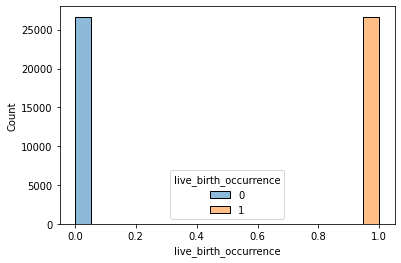

In [50]:
sns.histplot(train_set_rus, x = "live_birth_occurrence", hue = "live_birth_occurrence");

### 5.2. Oversampling

In [51]:
def ros_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 11)

    # Balancing set data
    x_ros, y_ros = ros.fit_resample(set_data.drop("live_birth_occurrence", axis = 1), set_data["live_birth_occurrence"])

    # Concatenate balanced data
    set_data_ros = pd.concat([x_ros, y_ros], axis = 1)

    # Return balanced data
    return set_data_ros

In [52]:
train_set_ros = ros_fit_resample(train_set)

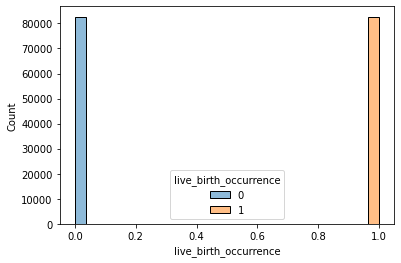

In [53]:
sns.histplot(train_set_ros, x = "live_birth_occurrence", hue = "live_birth_occurrence");

### 5.3. SMOTE

In [54]:
def sm_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    sm = SMOTE(random_state = 112)

    # Balancing set data
    x_sm, y_sm = sm.fit_resample(set_data.drop("live_birth_occurrence", axis = 1), set_data["live_birth_occurrence"])

    # Concatenate balanced data
    set_data_sm = pd.concat([x_sm, y_sm], axis = 1)

    # Return balanced data
    return set_data_sm

In [55]:
train_set_sm = sm_fit_resample(train_set)

<AxesSubplot:xlabel='live_birth_occurrence', ylabel='Count'>

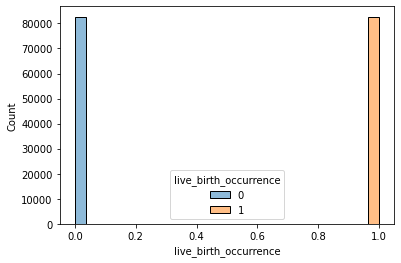

In [56]:
sns.histplot(train_set_sm, x = "live_birth_occurrence", hue = "live_birth_occurrence")

## 6. Dump Dataset

In [57]:
x_train = {
    "Undersampling" : train_set_rus.drop(columns = "live_birth_occurrence"),
    "Oversampling" : train_set_ros.drop(columns = "live_birth_occurrence"),
    "SMOTE" : train_set_sm.drop(columns = "live_birth_occurrence")
}

y_train = {
    "Undersampling" : train_set_rus["live_birth_occurrence"],
    "Oversampling" : train_set_ros["live_birth_occurrence"],
    "SMOTE" : train_set_sm["live_birth_occurrence"]
}

In [58]:
util.pickle_dump(x_train, "data/processed/x_train_feng.pkl")
util.pickle_dump(y_train, "data/processed/y_train_feng.pkl")

util.pickle_dump(valid_set.drop(columns = "live_birth_occurrence"), "data/processed/x_valid_feng.pkl")
util.pickle_dump(valid_set["live_birth_occurrence"], "data/processed/y_valid_feng.pkl")

util.pickle_dump(test_set.drop(columns = "live_birth_occurrence"), "data/processed/x_test_feng.pkl")
util.pickle_dump(test_set["live_birth_occurrence"], "data/processed/y_test_feng.pkl")